In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [111]:
df = pd.read_excel("../data/processed/dataset.xlsx")
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2010,24.0,32.4,25.9,85.0,0.0,1.5,NaN,NaN,NaN,NaN
1,02-01-2010,24.0,31.6,27.6,83.0,5.0,0.5,NaN,NaN,NaN,NaN
2,03-01-2010,24.0,29.6,27.0,86.0,24.0,3.2,NaN,NaN,NaN,NaN
3,04-01-2010,24.0,32.0,27.4,84.0,0.0,4.1,NaN,NaN,NaN,NaN
4,05-01-2010,24.0,34.4,27.8,80.0,8.0,4.2,NaN,NaN,NaN,NaN


In [112]:
df = df[["Tanggal", "RH_avg"]]
df["RH_avg"] = df["RH_avg"].astype("Int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  5144 non-null   object
 1   RH_avg   5136 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 85.5+ KB


In [113]:
df["RH_avg"].fillna(method="ffill", inplace=True)
df.isnull().sum()

Tanggal    0
RH_avg     0
dtype: int64

In [114]:
Q1 = df["RH_avg"].quantile(0.25)
Q3 = df["RH_avg"].quantile(0.75)
IQR = Q3 - Q1
IQR

8.0

<Axes: xlabel='RH_avg'>

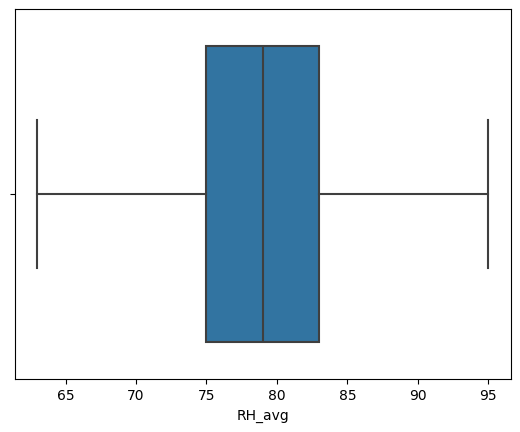

In [115]:
df = df[~((df['RH_avg'] < (Q1 - 1.5 * IQR)) | (df['RH_avg'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=df["RH_avg"])

In [116]:
df.describe()

,RH_avg
count,5110.0
mean,79.103523
std,5.75102
min,63.0
25%,75.0
50%,79.0
75%,83.0
max,95.0


In [117]:
df.head()

,Tanggal,RH_avg
0,01-01-2010,85
1,02-01-2010,83
2,03-01-2010,86
3,04-01-2010,84
4,05-01-2010,80


In [118]:
train_size = int(len(df["RH_avg"]) * 0.8)

train_data = df[:train_size]
test_data = df[train_size:]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

Train size: 4088, Test size: 1022


In [119]:
df.to_csv("../data/processed/dataset.csv", index=False)
train_data.to_csv("../data/processed/train_set.csv", index=False)
test_data.to_csv("../data/processed/test_set.csv", index=False)

In [120]:
df = pd.read_csv("../data/processed/dataset.csv")
df

,Tanggal,RH_avg
0,01-01-2010,85
1,02-01-2010,83
2,03-01-2010,86
3,04-01-2010,84
4,05-01-2010,80
...,...,...
5105,25-02-2024,72
5106,26-02-2024,73
5107,27-02-2024,63
5108,28-02-2024,63


In [121]:
train_data = pd.read_csv("../data/processed/train_set.csv")
train_data

,Tanggal,RH_avg
0,01-01-2010,85
1,02-01-2010,83
2,03-01-2010,86
3,04-01-2010,84
4,05-01-2010,80
...,...,...
4083,23-04-2021,84
4084,24-04-2021,89
4085,25-04-2021,84
4086,26-04-2021,80


In [122]:
test_data = pd.read_csv("../data/processed/test_set.csv")
test_data

,Tanggal,RH_avg
0,28-04-2021,82
1,29-04-2021,82
2,30-04-2021,81
3,01-05-2021,85
4,02-05-2021,82
...,...,...
1017,25-02-2024,72
1018,26-02-2024,73
1019,27-02-2024,63
1020,28-02-2024,63
